### NAME: MOHAN S
### REG.NO: 212223240094

# Face Detection with Haar Cascades

In [5]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [6]:
model = cv2.imread('image_01.png',0)
withglass = cv2.imread('image_02.png',0)
group = cv2.imread('image_03.jpeg',0)

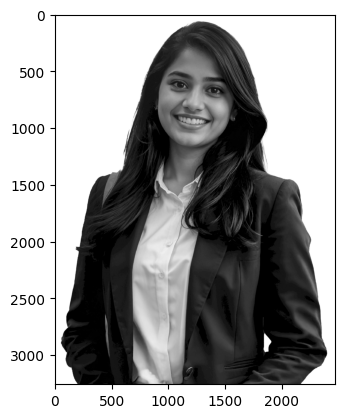

In [7]:
plt.imshow(model,cmap='gray')
plt.show()

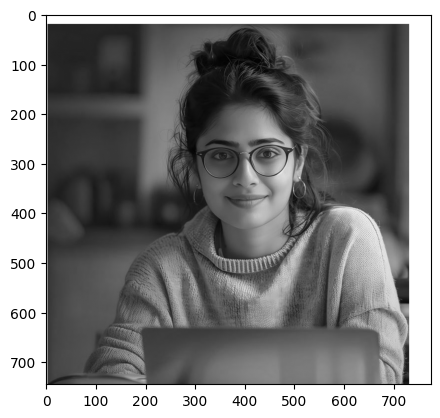

In [8]:
plt.imshow(withglass,cmap='gray')
plt.show()

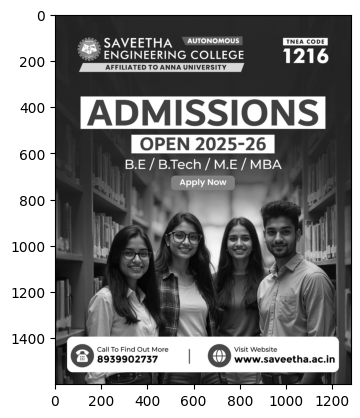

In [9]:
plt.imshow(group,cmap='gray')
plt.show()

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [10]:
face_cascade = cv2.CascadeClassifier('DIPT_PROJECT_FACEDETECTION/haarcascade_frontalface_default.xml')

In [11]:
import cv2

# Correct path (adjust if needed)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img) 
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img


In [12]:
result = detect_face(withglass)

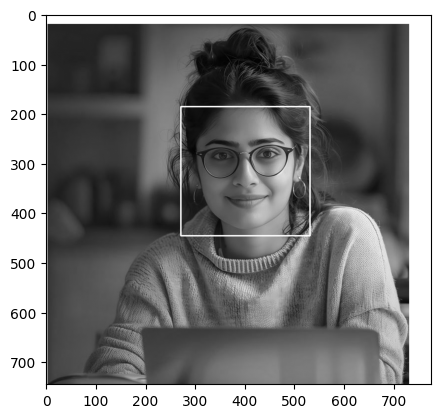

In [13]:
plt.imshow(result,cmap='gray')
plt.show()

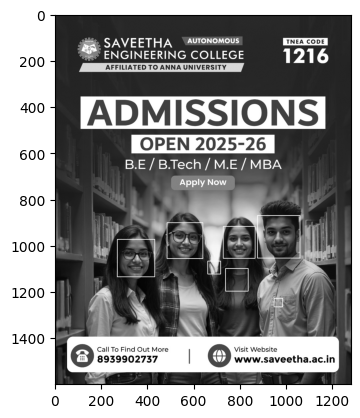

In [14]:
result = detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

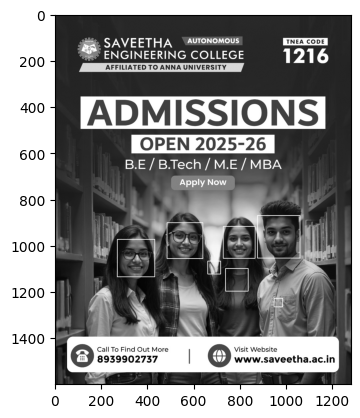

In [15]:
# Gets errors!
result = detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

In [16]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 7) 
        
    return face_img
    

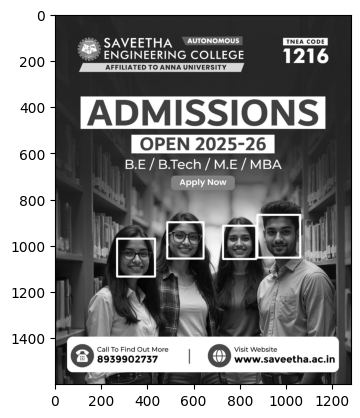

In [17]:
# Doesn't detect the side face.
result = adj_detect_face(group)
plt.imshow(result,cmap='gray')
plt.show()

## Eye Cascade File

In [18]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [19]:
import cv2

# Proper path to the eye detection Haar cascade
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def detect_eyes(img):
    face_img = img.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (x, y, w, h) in eyes:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
    return face_img


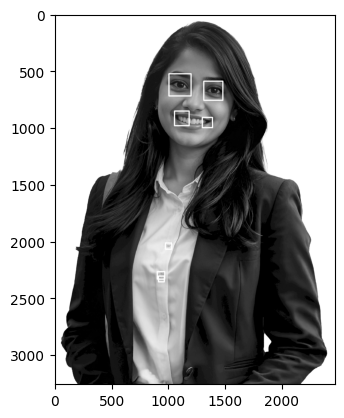

In [20]:
result = detect_eyes(model)
plt.imshow(result,cmap='gray')
plt.show()

In [21]:
eyes = eye_cascade.detectMultiScale(withglass) 

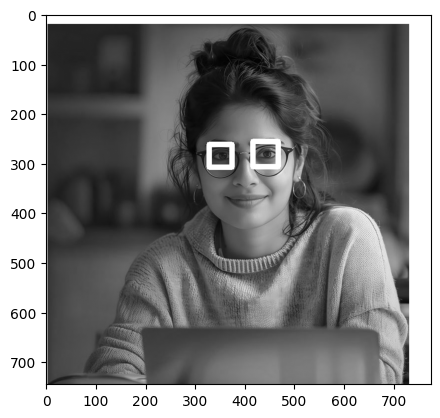

In [22]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(withglass)
plt.imshow(result,cmap='gray')
plt.show()

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Conjunction with Video

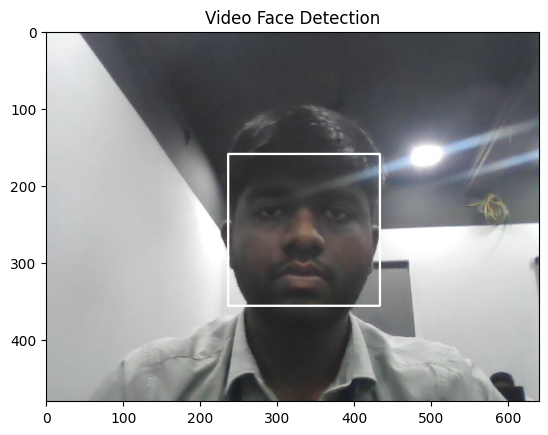

In [ ]:
cap = cv2.VideoCapture(0)

# Set up matplotlib
plt.ion()
fig, ax = plt.subplots()

ret, frame = cap.read(0)
frame = detect_face(frame)
im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Video Face Detection')

while True:
    ret, frame = cap.read(0)

    frame = detect_face(frame)

    # Update matplotlib image
    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(0.10)

   

cap.release()
plt.close()

### NAME: MOHAN S
### REG.NO: 212223240094